In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 


In [34]:
def abs_sobel_thres(img, orient='x', kernel=3, threshold=(0,255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel) if orient == 'x' else cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >=threshold[0]) & (scaled_sobel <= threshold[1])] = 1
    return binary_output

def mag_gradient(img, kernel=3, threshold=(0,255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel)
    abs_sobelxy = np.sqrt(np.power(sobelx, 2)+np.power(sobely, 2))
    scaled_gradient = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    binary_output = np.zeros_like(scaled_gradient)
    binary_output[(scaled_gradient >= threshold[0])&(scaled_gradient <= threshold[1])] = 1
    return binary_output

def dir_gradient(img, kernel=3, threshold=(0.7, 1,3)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel)
    dir_sobelxy = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output = np.zeros_like(dir_sobelxy)
    binary_output[(dir_sobelxy >= threshold[0]) & (dir_sobelxy <= threshold[1])] = 1
    return binary_output

Text(0.5, 1.0, 'direction threshold image')

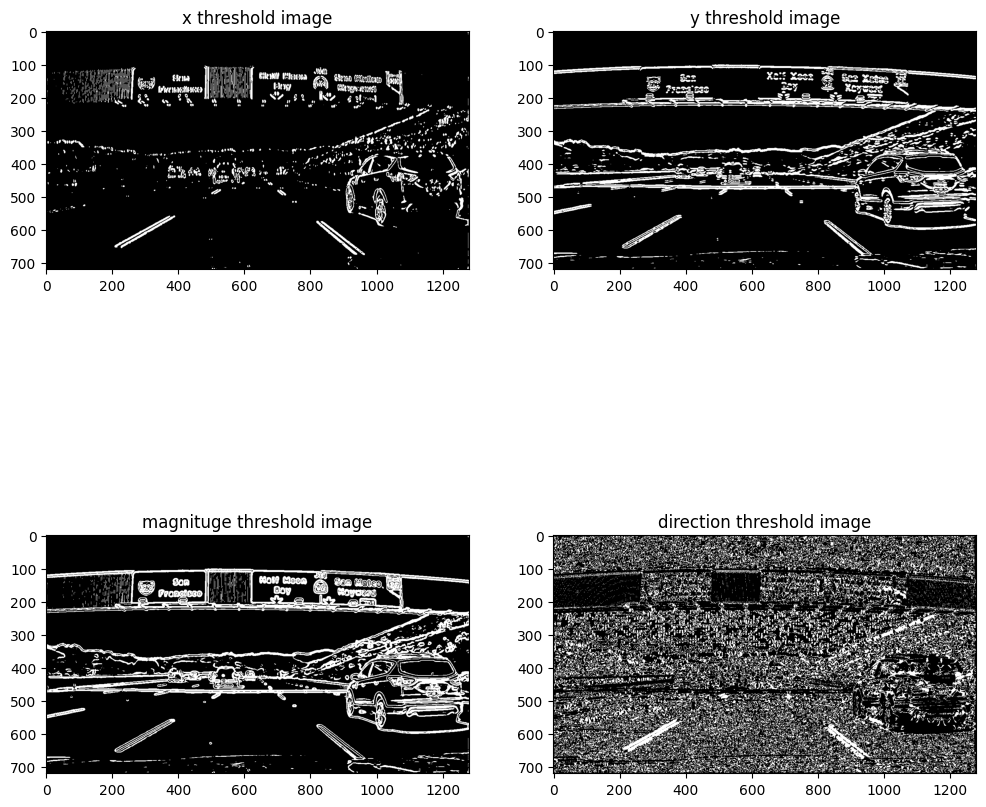

In [36]:
image = mpimg.imread("signs_vehicles_xygrad.png")
abs_thresx = abs_sobel_thres(image, kernel=15, threshold=(20, 100))
abs_thresy = abs_sobel_thres(image,orient='y', kernel=15, threshold=(20, 100))
mag_thres = mag_gradient(image, kernel=15, threshold=(20, 100))
dir_thres = dir_gradient(image, kernel=15, threshold=(0.8, 1.3))
f,arrax = plt.subplots(2,2, figsize=(12,12))
arrax[0,0].imshow(abs_thresx, cmap='gray')
arrax[0,0].set_title("x threshold image")
arrax[0,1].imshow(abs_thresy, cmap='gray')
arrax[0,1].set_title("y threshold image")
arrax[1,0].imshow(mag_thres, cmap='gray')
arrax[1,0].set_title("magnituge threshold image")
arrax[1,1].imshow(dir_thres, cmap='gray')
arrax[1,1].set_title("direction threshold image")

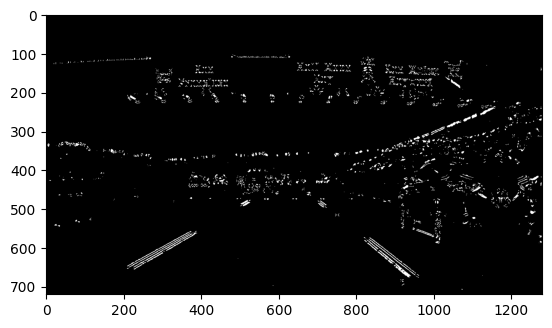

In [67]:
combined = np.zeros_like(dir_thres)
combined[((abs_thresx == 1) & (mag_thres==1) &(dir_thres == 1))] = 1
plt.imshow(combined, cmap='gray')